# Redes Neurais

## Introdução

Nesta pasta da biblioteca do TensorFlow, veremos como criar redes neurais. Como a introdução será grande, então vamos dividí-la em subseções.

A menor unidade de uma rede é o **neurônio**, que recebe os dados, e cada tipo de dado possui um **peso** ("importância"). 

**O aprendizado da rede se dá pelo ajuste desses pesos**, e essa ideia será retomada algumas vezes ao longo deste notebook. 

### Função de Ativação

Cada neurônio é dotado de uma **função de ativação**. As funções de ativação costumam ser as seguintes, considerando $x$ como a soma ponderada das entradas:


* **Threshold**: esta é a função degrau $f(x)$ que é $0$ se $x<0$ e $1$ se $x \geq 0$.

Text(0.5, 1.0, 'Função Threshold (degrau)')

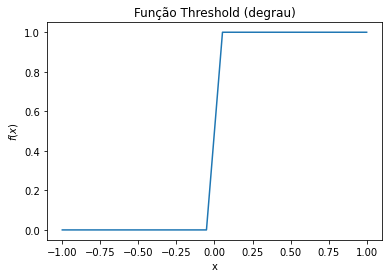

In [2]:
from numpy import linspace, heaviside
from pylab import legend, title, xlabel, ylabel, plot

x = linspace(-1,1,20)
y = heaviside(x,1)

plot(x,y)
xlabel('x')
ylabel('$f(x)$')
title('Função Threshold (degrau)')

* **Sigmoid**: ela costuma ser usada em modelos de regressão logistica, e nas camadas de saída (este conceito será explicado depois). A função é dada por

$  \LARGE f(x) = \frac{1}{1 + e^{-x}} $.

Text(0.5, 1.0, 'Função Sigmoid')

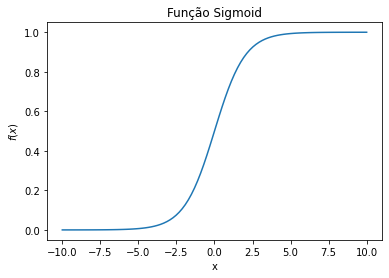

In [5]:
from numpy import e

x = linspace(-10,10,100)
y = 1/(1 + e**(-x))

plot(x,y)

xlabel('x')
ylabel('$f(x)$')
title('Função Sigmoid')

* **Relu**: é uma abreviação para "Rectified linear unit", que é uma função $f(x) = 0$ se $x \leq 0$ e $f(x) = x$ se $x > 0$. 

Text(0.5, 1.0, 'Função Relu')

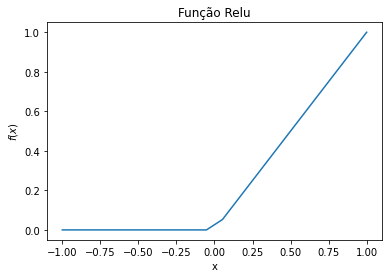

In [7]:
from numpy import maximum

def relu(x):
    return maximum(0,x)

x = linspace(-1,1,20)
y = relu(x)

plot(x,y)

xlabel('x')
ylabel('$f(x)$')
title('Função Relu')

* **Tangente Hiperbólica**: como o próprio nome diz, essa é a função tangente hiperbólica dada por

$\Large f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$.

Text(0.5, 1.0, 'Tangente Hiperbólica')

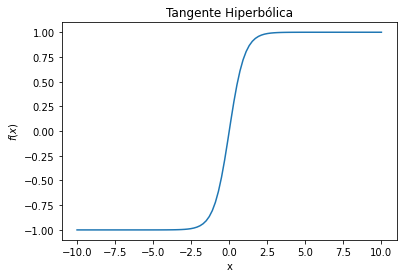

In [11]:
from numpy import tanh

x = linspace(-10,10,100)
y = tanh(x)

plot(x,y)

xlabel('x')
ylabel('$f(x)$')
title('Tangente Hiperbólica')

Obs: embora seja muito parecida com a sigmoide, a tangente hiperbólica pode assumir valores negativos, enquanto que a sigmoide não.

### Estrutura de uma rede

Agora que vimos o que há dentro de cada neurônio, vejamos como se dá a estrutura de uma rede neural. As redes costumas estar organizadas em

* **Camada de entrada**: constituída de atributos;

* **Camadas Ocultas**: constituída pelos neurônios;

* **Camada de Saída**: constituída de neurônios. O número de neurônios é igual ao número de resultados (classes) possíveis.

Em geral, o número de neurônios necessŕios para construir a rede é dado pela relação $(a+b)/2$, onde $a$ é a quantidade de atributos (característica), e $b$ é a quantidade de classes (resultados possíveis).

Uma vez que todos os registros passaram pela rede, dizemos que uma **epoch** foi completa. Quando isso ocorre, "entra em cena" a chamada **função de custo/prejuízo**, que avalia a diferença entre a previsão e o valor real. Um exemplo desse tipo de função é o RMS - root mean square.

Uma vez calculado o erro, a rede atualiza os pesos, e isso ocorre a cada epoch.

Até achar os melhores pesos, o método usado para atualizar a cada epoch é o **Gradient Descent**, que usa o gradiente - vide cálculo de várias variáveis - para achar um ponto de extremo que minimize os erros. Esse método funciona bem para funções com concavidade para cima. Para funções que não tem essa propriedade, é usado o **Stochastic Gradient Descent**.


Descrevendo o funcionamento dessa maneira, temos a impressão de que o modelo fica viciado no sentido de que - depois de várias epochs - ele fica super-ajustado aos dados de treino apenas. Contudo, a rede possui formas de evitar esse super-ajuste chamadas de **Regularização**. A técnica de Regularização mais conhecida é o **dropout**, onde um ou mais neurônios são descartados.

Agora que vimos o que é uma rede neural e suas características, vamos aplicá-lo na prática com os dados do Iris.

## Dados Iniciais

Como dito anteriormente, vamos importar os dados do Iris.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import argmax


base = datasets.load_iris()

previsores = base.data

classe = base.target

classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## ```np_utils```

Como temos 3 tipos de resultados possíveis - Setosa, Virginica e Versicolor - então vamos transformar cada elemento desse array numa linha com 3 colunas. Desta maneira, a camada de saída, que possuirá 3 neurônios, vai atuar em cada coluna desse novo objeto para identificar o tipo de planta.

Para fazer isso, digitamos

In [2]:
from keras.utils import np_utils

classe_dummy = np_utils.to_categorical(classe)

classe_dummy

2022-02-03 16:53:19.645488: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-03 16:53:19.645551: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Assim, quando temos 1, na primeira coluna e 0 nas demais, então a planta corresponde a uma Setosa, e assim por diante. Deste modo, vamos realizar o fatiamento dos dados em treino e teste da mesma maneira que fizemos em outros modelos.

In [3]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

## ```Dense()```

Agora que preparamos os dados iniciais, vamos nos dedicar à criação da rede. Para isso precisamos primeiramente de camadas, que podem ser importadas fazendo

In [4]:
from keras.layers import Dense

Assim, dentre os argumentos que existem, destacamos

* ```units```: número de neurônios;

* ```activation```: função de ativação a ser usada. Se não for especificada, o programa vai tomar f(x) = x;

* ```input_dim```:  dimensão dos dados da entrada. No nosso caso, ele é igual a 4 pois temos 4 características: comprimeto da pétala, largura da pétala, comprimento da sépala e largura da sépala.

Posto isso, criemos 3 camadas para o problema do Iris

In [5]:
camada1 = Dense(units = 5, input_dim = 4)

camada2 = Dense(units = 4)

camada3 = Dense(units = 3, activation = 'softmax')

A primeira camada contém um neurônio a mais por causa do bias (eu acho); já o segundo contém 4 neurônios como devia ser. Por fim, o último possui 3 neurônios pois temos 3 classes (resultados possíveis), que são Setosa, Vericolor e Virginica. 

Além disso, usamos a função de ativação softmax pois o problema possui mais de duas classes; e com isso geramos uma probabilidade em cada neurônio, similar ao agrupamento difuso (vide o notebook da pasta Skfuzzy sobre o c-means).

## ```Sequential()```

Com as camadas criadas, vamos nos atentar à estrutura da rede propriamente dita. No caso do Iris, criaremos uma rede sequencial. Importamos essa classe digitando

In [6]:
from keras.models import Sequential

Obs: A documentação com todos os argumentos, atributos e métodos se encontra em https://www.tensorflow.org/api_docs/python/tf/keras/Sequential.

Criamos o modelo fornecendo o parâmetro ```layers``` (camadas) com uma lista contendo as camadas que a rede terá. 

In [7]:
modelo = Sequential(layers = [camada1, camada2])

2022-02-03 16:53:50.573244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-03 16:53:50.573288: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-03 16:53:50.573320: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ProBook6460b): /proc/driver/nvidia/version does not exist


Para adicionar mais camadas, usamos o método ```add```

In [8]:
modelo.add(camada3)

Podemos ver um resumo do que fizemos até agora usando o método ```summary```

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


Uma vez feito isso, vamos configurar o modelo para o treino, que é feito através do método ```compile```. Dentre os argumentos que existem nesse método, destacamos

* ```optimizer```: função que atualiza os pesos. Pode ser ```adadelta```, ```adam```, ```adagrad```, dentre outros. Ver https://www.tensorflow.org/api_docs/python/tf/keras/optimizers. Neste caso, usaremos o ```adam``` pois é um método do tipo *stochastic gradient descent*.

* ```loss```: função de perda. Escolheremos a ```categorical_corssentropy``` para o caso do Iris. Caso queiramos ver outras funções, basta acessar https://www.tensorflow.org/api_docs/python/tf/keras/losses na parte de 'Functions'.

* ```metrics```: lista com o nome da função para avaliar a precisão do modelo. Usaremos ```accuracy``` neste caso. Demais funções podem ser vistas em https://www.tensorflow.org/api_docs/python/tf/keras/metrics.

In [10]:
modelo.compile(optimizer = 'adam', 
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Agora sim, com todo o "terreno preparado", vamos treinar nossa rede com o método ```fit```. Esse método possui vários argumentos, que podem ser acessados em https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit. Por hora, vamos nos ater aos seguintes argumentos

* ```x```: dados de **treino** contendo as características. No nosso caso ele corresponde aos dados de treino contendo o comprimento e a largura das pétalas e sépalas de cada planta;

* ```y```: dados de **treino** contendo os resultados (classe) de cada linha; 

* ```epochs```: número de vezes que todos os registros passam pela rede. É isso que vai tornar lento o treinamento do modelo;

* ```validation_data```: dados de **teste** contendo as instâncias e as classes. Ela costuma ser dada na forma de tupla, na ordem ```(Xteste,Yteste)```

Obs: ao contrário dos outros modelos, o ```x``` está em **minúsculo**.

In [11]:
modelo.fit(x = X_treinamento,
           y = y_treinamento, 
           epochs = 1000,
           validation_data = (X_teste, y_teste) )

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 4.5296 - accuracy: 0.3238 - val_loss: 3.4406 - val_accuracy: 0.3556
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.1152 - accuracy: 0.3238 - val_loss: 3.0931 - val_accuracy: 0.3556
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 3.7084 - accuracy: 0.3238 - val_loss: 2.7623 - val_accuracy: 0.3556
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 3.3275 - accuracy: 0.3238 - val_loss: 2.4488 - val_accuracy: 0.3556
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.9588 - accuracy: 0.3238 - val_loss: 2.1588 - val_accuracy: 0.3556
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.6059 - accuracy: 0.3238 - val_loss: 1.8942 - val_accuracy: 0.3556
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.2987 - accuracy: 0.3238 - val_loss: 1.6527 - val_accuracy: 0.3556
Epoch 8/1000


Como podemos ver, depois de 1000 epochs, a rede atingiu uma precisão maior que **98 %**. A maior precisão que conseguimos com respeito aos outros modelos já testados.

## Precisão do modelo

Para gerar um array com a previsão do modelo, usamos o método ```predict```, fornecendo os valores x de teste como nos demais modelos.

In [15]:
previsoes = modelo.predict(X_teste)

previsoes

array([[1.27450186e-11, 7.66148805e-05, 9.99923348e-01],
       [1.64250814e-04, 9.96276319e-01, 3.55934515e-03],
       [9.99980569e-01, 1.93792584e-05, 7.88242943e-22],
       [4.20613058e-11, 1.99648854e-03, 9.98003542e-01],
       [9.99538064e-01, 4.61985124e-04, 1.42141459e-17],
       [4.98596607e-13, 2.13485764e-05, 9.99978662e-01],
       [9.99780953e-01, 2.19091453e-04, 3.24138064e-18],
       [4.81294046e-05, 9.90557432e-01, 9.39441845e-03],
       [1.59432093e-05, 9.67495859e-01, 3.24882641e-02],
       [4.72837797e-04, 9.98495936e-01, 1.03129004e-03],
       [1.28788376e-08, 3.04095186e-02, 9.69590485e-01],
       [1.46645732e-04, 9.96375859e-01, 3.47741460e-03],
       [4.88008700e-05, 9.85498309e-01, 1.44529752e-02],
       [2.33477331e-05, 9.45126176e-01, 5.48505299e-02],
       [3.32486707e-05, 9.53299761e-01, 4.66669314e-02],
       [9.99889612e-01, 1.10394954e-04, 2.87392168e-19],
       [4.92113468e-05, 9.47949588e-01, 5.20012043e-02],
       [7.35133654e-05, 9.60531

Como podemos ver, ele retorna uma matriz onde cada elemento é uma probabilidade. Por exemplo, na linha 1 temos que o primeiro elemento é 1.27450186e-11 (menor que 1%). Isso significa que a chance da primeira linha ser do tipo Setosa é praticamente desprezível.

Dado que os valores de teste esão no formato

In [13]:
y_teste

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

então vamos transformar os dois objetos em listas, onde cada elemento corresponde ao índice do maior valor de cada linha.

In [16]:
y_teste_matrix = [argmax(t) for t in y_teste]

y_previsao_matrix = [argmax(t) for t in previsoes]

In [17]:
y_previsao_matrix

[2,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 0]

In [18]:
y_teste_matrix

[2,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0]

Agora sim podemos calcular a matriz de confusão do problema.

In [19]:
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)

confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

**APENAS 1 ELEMENTO ESTAVA ERRADO.**